In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2.2 DAgger

In [2]:
# Import mean and std csv files from benchmark/ folder as dict of np arrays with header as keys
def import_csv(file):
    data = np.genfromtxt(file, delimiter=",", names=True)
    return data

In [3]:
ant_mean = import_csv(
    "../../benchmark/mean/q2_dagger_ant_Ant-v2_17-09-2024_20-21-48.csv"
)
ant_std = import_csv("../../benchmark/std/q2_dagger_ant_Ant-v2_17-09-2024_20-21-48.csv")
ant_expert_mean = 4713.6533203125
ant_expert_std = 12.196533203125
ant_bc_mean = 4714.01708984375

humanoid_mean = import_csv(
    "../../benchmark/mean/q2_dagger_humanoid_train_longer_Humanoid-v2_17-09-2024_20-44-16.csv"
)
humanoid_std = import_csv(
    "../../benchmark/mean/q2_dagger_humanoid_train_longer_Humanoid-v2_17-09-2024_20-44-16.csv"
)
humanoid_expert_mean = 10344.517578125
humanoid_expert_std = 20.9814453125
humanoid_bc_mean = 248.40753173828125

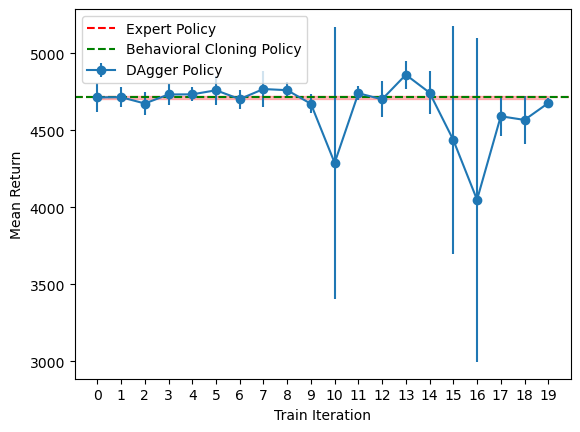

In [4]:
# Plot ant's mean vs step with std deviation
plt.figure()
plt.errorbar(
    ant_mean["Step"],
    ant_mean["Value"],
    yerr=ant_std["Value"],
    fmt="-o",
    label="DAgger Policy",
)
plt.axhline(y=ant_expert_mean, color="r", linestyle="--", label="Expert Policy")
plt.axhline(y=ant_bc_mean, color="g", linestyle="--", label="Behavioral Cloning Policy")
plt.fill_between(
    ant_mean["Step"],
    ant_expert_mean - ant_expert_std,
    ant_expert_mean + ant_expert_std,
    color="r",
    alpha=0.25,
)
plt.xticks(ant_mean["Step"])
plt.xlabel("Train Iteration")
plt.ylabel("Mean Return")
plt.legend()

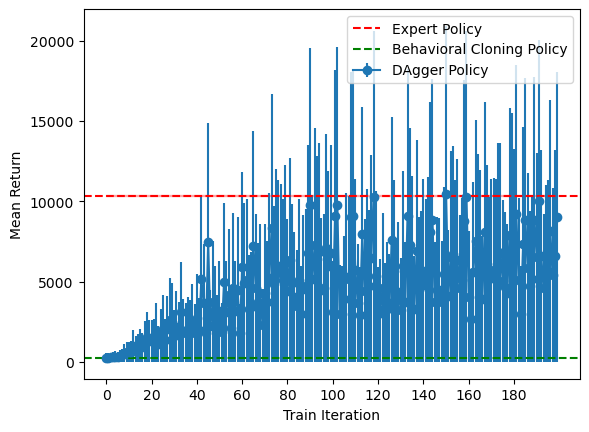

In [5]:
# Plot humanoid's mean vs step with std deviation
plt.figure()
plt.errorbar(
    humanoid_mean["Step"],
    humanoid_mean["Value"],
    yerr=humanoid_std["Value"],
    fmt="-o",
    label="DAgger Policy",
)
plt.axhline(y=humanoid_expert_mean, color="r", linestyle="--", label="Expert Policy")
plt.axhline(
    y=humanoid_bc_mean, color="g", linestyle="--", label="Behavioral Cloning Policy"
)
plt.fill_between(
    humanoid_mean["Step"],
    humanoid_expert_mean - humanoid_expert_std,
    humanoid_expert_mean + humanoid_expert_std,
    color="r",
    alpha=0.25,
)
plt.xticks(humanoid_mean["Step"][::20])  # Show every 20th step
plt.xlabel("Train Iteration")
plt.ylabel("Mean Return")
plt.legend()